In [1]:
from pycaret.time_series import *
import pandas as pd

df = pd.read_csv("province/data_eng_hour.csv", parse_dates=["timestamp"], index_col="timestamp")
# df.index = df.index.normalize()
df = df.drop(columns=["Unnamed: 0"])

print(df.index.duplicated().sum())  # นับจำนวน index ที่ซ้ำกัน
print(df.index[df.index.duplicated()])  # แสดงค่าที่ซ้ำ
df = df[~df.index.duplicated(keep="last")]
df = df.asfreq("H")  # ตั้งค่าความถี่เป็นรายวัน
df = df.interpolate()

# ตรวจสอบข้อมูลอีกครั้ง
print("จำนวน index ที่ซ้ำกันหลังจากแก้ไข:", df.index.duplicated().sum())
print("Index เป็น unique หรือไม่:", df.index.is_unique)

# แปลงคอลัมน์ timestamp ให้เป็น DatetimeIndex หากยังไม่ได้ทำ
df.index = pd.to_datetime(df.index)
# ตรวจสอบให้แน่ใจว่าไม่มีคอลัมน์ที่ไม่ต้องการ
df = df[['pm_2_5', 'humidity', 'pm_10', 'temperature']]  # ใช้เฉพาะคอลัมน์ที่ต้องการ

# ลองเรียกใช้งาน setup อีกครั้ง
train_size = int(len(df))-7
train_df = df.iloc[:train_size]  # ใช้ข้อมูลก่อนหน้าทั้งหมดเป็น train set
test_df = df.iloc[train_size:]  
train_df.index = train_df.index.to_period("H")
test_df.index = test_df.index.to_period("H")
print(len(train_df), len(test_df))
df

0
DatetimeIndex([], dtype='datetime64[ns]', name='timestamp', freq=None)
จำนวน index ที่ซ้ำกันหลังจากแก้ไข: 0
Index เป็น unique หรือไม่: True
16375 7


,pm_2_5,humidity,pm_10,temperature
timestamp,,,,
2023-03-31 22:00:00,4.727273,62.659563,4.727273,27.147784
2023-03-31 23:00:00,4.782172,62.826294,4.798406,27.263674
2023-04-01 00:00:00,4.837072,62.993024,4.869540,27.379565
2023-04-01 01:00:00,4.891972,63.159754,4.940673,27.495455
2023-04-01 02:00:00,4.946871,63.326485,5.011806,27.611346
...,...,...,...,...
2025-02-11 07:00:00,36.944323,89.694123,41.741450,23.936865
2025-02-11 08:00:00,37.568627,90.929747,42.294118,23.684319
2025-02-11 09:00:00,38.800000,83.511569,42.916667,25.896389


In [2]:
from pycaret.time_series import TSForecastingExperiment
s = TSForecastingExperiment()


target = 'pm_2_5'
print(train_df["pm_2_5"])





timestamp
2023-03-31 22:00     4.727273
2023-03-31 23:00     4.782172
2023-04-01 00:00     4.837072
2023-04-01 01:00     4.891972
2023-04-01 02:00     4.946871
                      ...    
2025-02-11 00:00    32.574191
2025-02-11 01:00    33.198495
2025-02-11 02:00    33.822800
2025-02-11 03:00    34.447104
2025-02-11 04:00    35.071409
Freq: H, Name: pm_2_5, Length: 16375, dtype: float64


In [3]:
df.tail(10)
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [4]:

# features = ['humidity', 'pm_10', 'temperature']  # ฟีเจอร์ที่เราจะพยากรณ์
# model = create_model('arima')


# future_exog = pd.DataFrame(index=test_df.index)
# # สร้างโมเดล ARIMA สำหรับแต่ละฟีเจอร์
# for feature in features:
#     # เรียก setup() โดยใช้ train_df
#     exp = setup(data=train_df[feature],fh=7, session_id=123, fold_strategy='rolling',seasonal_period=12, use_gpu=True)

    
#     # สร้างโมเดล ARIMA
#     tune = tune_model(model,optimize= "MASE", n_iter=30)
#     # print(predict_model(model))/////////////////////////////////////
#     final = finalize_model(tune)
#     # print(final)
#     # best = finalize_model(model)
#     # print(best,X=train_df)
#     # ทำนายอนาคต
#     future_predictions = predict_model(final, fh=len(test_df))
#     print(future_predictions)
    
#     # บันทึกผลลัพธ์ลงใน future_exog
#     future_exog[feature] = future_predictions['y_pred'].values

# # แสดงผลลัพธ์
# print(future_exog)



In [5]:
train_df

,pm_2_5,humidity,pm_10,temperature
timestamp,,,,
2023-03-31 22:00,4.727273,62.659563,4.727273,27.147784
2023-03-31 23:00,4.782172,62.826294,4.798406,27.263674
2023-04-01 00:00,4.837072,62.993024,4.869540,27.379565
2023-04-01 01:00,4.891972,63.159754,4.940673,27.495455
2023-04-01 02:00,4.946871,63.326485,5.011806,27.611346
...,...,...,...,...
2025-02-11 00:00,32.574191,81.044753,37.872777,25.704690
2025-02-11 01:00,33.198495,82.280378,38.425445,25.452144
2025-02-11 02:00,33.822800,83.516002,38.978112,25.199597


In [ ]:

exp = setup(data=train_df[target],target=target,fh=7, session_id=123, fold_strategy="rolling",seasonal_period=12, use_gpu=True)




,Description,Value
0,session_id,123
1,Target,pm_2_5
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(16375, 1)"
5,Transformed data shape,"(16375, 1)"
6,Transformed train set shape,"(16368, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

: 

In [ ]:
model = create_model('auto_arima')
# best = tune_model(model)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:43:52
Status,. . . . . . . . . . . . . . . . . .,Fitting 3 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
future_predictions = predict_model(model)
print(future_predictions)
print(test_df.tail(7))

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,0.7016,0.5378,7.4700,7.6829,0.2233,0.2529,-36.8619


                   y_pred
2025-02-10 22:00  26.6996
2025-02-10 23:00  26.5584
2025-02-11 00:00  25.9580
2025-02-11 01:00  24.9551
2025-02-11 02:00  25.1335
2025-02-11 03:00  25.4100
2025-02-11 04:00  25.3851
                     pm_2_5   humidity      pm_10  temperature
timestamp                                                     
2025-02-11 05:00  35.695714  87.222875  40.636115    24.441958
2025-02-11 06:00  36.320018  88.458499  41.188782    24.189411
2025-02-11 07:00  36.944323  89.694123  41.741450    23.936865
2025-02-11 08:00  37.568627  90.929747  42.294118    23.684319
2025-02-11 09:00  38.800000  83.511569  42.916667    25.896389
2025-02-11 10:00  23.333333  72.046736  27.533333    28.852626
2025-02-11 11:00  21.850000  64.332405  25.916667    30.593716


In [ ]:
final_best = finalize_model(model)

In [ ]:

predictions_future = predict_model(final_best)
print(predictions_future)
print(test_df)

                   y_pred
2025-02-11 05:00  34.5516
2025-02-11 06:00  33.9910
2025-02-11 07:00  34.7905
2025-02-11 08:00  33.3991
2025-02-11 09:00  32.7927
2025-02-11 10:00  34.9431
2025-02-11 11:00  35.0228
                     pm_2_5   humidity      pm_10  temperature
timestamp                                                     
2025-02-11 05:00  35.695714  87.222875  40.636115    24.441958
2025-02-11 06:00  36.320018  88.458499  41.188782    24.189411
2025-02-11 07:00  36.944323  89.694123  41.741450    23.936865
2025-02-11 08:00  37.568627  90.929747  42.294118    23.684319
2025-02-11 09:00  38.800000  83.511569  42.916667    25.896389
2025-02-11 10:00  23.333333  72.046736  27.533333    28.852626
2025-02-11 11:00  21.850000  64.332405  25.916667    30.593716


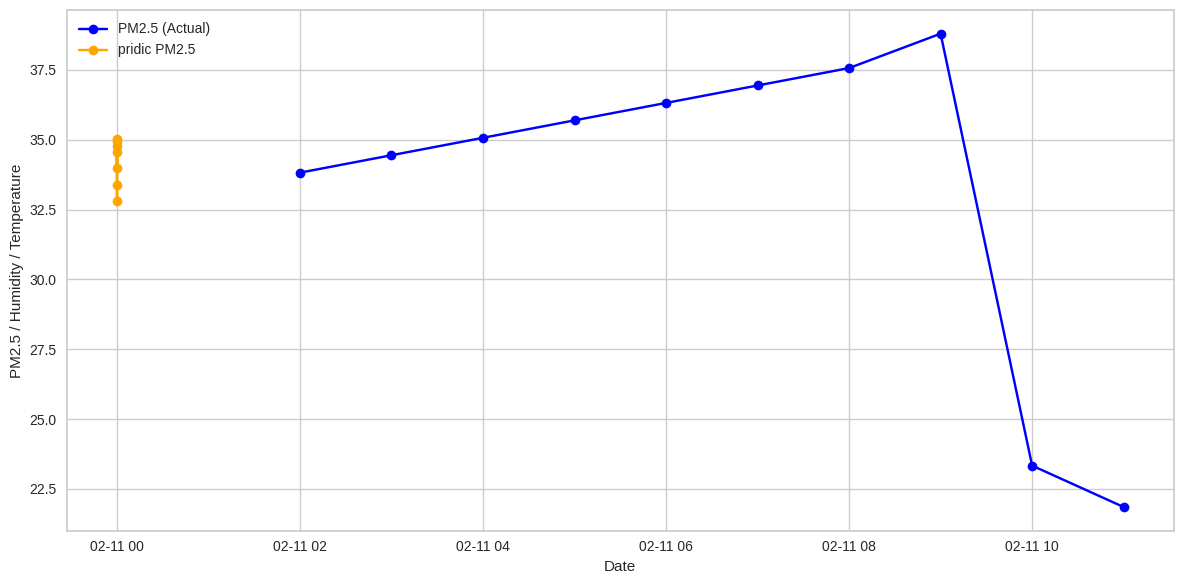

In [ ]:
import matplotlib.pyplot as plt

# สร้าง figure และแกน Y แรก
fig, ax1 = plt.subplots(figsize=(12, 6))

# พลอตข้อมูลจาก df บนแกน Y แรก
ax1.plot(df.index[-10:], df['pm_2_5'][-10:], label='PM2.5 (Actual)', color='blue', linestyle='-', marker='o')
# ax1.plot(df.index, df['humidity'], label='Humidity', color='green', linestyle='-', marker='s')
ax1.plot(predictions_future.index,predictions_future, label='pridic PM2.5', color='orange', linestyle='-', marker='o')

# ตั้งค่าแกน Y แรก
ax1.set_xlabel('Date')
ax1.set_ylabel('PM2.5 / Humidity / Temperature')
ax1.tick_params(axis='y')

# สร้างแกน Y ที่สอง
# ax2 = ax1.twinx()

# พลอตข้อมูลจริงและข้อมูลที่ทำนายบนแกน Y ที่สอง
# ax1.plot(actual_values.index, predictions_future, label='Actual PM2.5', color='red', linestyle='--', marker='x')
# ax2.plot(predicted_values.index, predicted_values, label='Predicted PM2.5', color='purple', linestyle='--', marker='d')

# ตั้งค่าแกน Y ที่สอง
# ax2.set_ylabel('PM2.5 (Actual & Predicted)')
# ax2.tick_params(axis='y')

# เพิ่มคำอธิบายเส้น (legend)
lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 , labels1 , loc='upper left')

# เพิ่มกริด
ax1.grid(True)

# ปรับระยะห่างให้เหมาะสม
plt.tight_layout()

# แสดงกราฟ
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# คำนวณค่า error metrics
# actual_values คือค่าจริงจากข้อมูลทดสอบ (ที่ในที่นี้ใช้ df)
actual_values = df['pm_2_5'][-len(predictions_future):]

# predicted_values คือค่าทำนายจาก model
predicted_values = predictions_future['y_pred']

# คำนวณค่า error
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
rmse = np.sqrt(mse)
r2 = r2_score(actual_values, predicted_values)

# แสดงผลลัพธ์
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 5.798049834285714
Mean Squared Error (MSE): 53.30774703397655
Root Mean Squared Error (RMSE): 7.301215449086306
R-squared (R2): -0.21909031256585942


: 

In [ ]:
# from pycaret.time_series import *
# import pandas as pd

# # โหลดข้อมูล
# df = pd.read_csv("province/data_eng_hour.csv", parse_dates=["timestamp"], index_col="timestamp")
# df = df.drop(columns=["Unnamed: 0"])

# # ตรวจสอบและจัดการกับ index ที่ซ้ำกัน
# print("จำนวน index ที่ซ้ำกัน:", df.index.duplicated().sum())
# df = df[~df.index.duplicated(keep="last")]

# # ตั้งค่าความถี่เป็นรายชั่วโมงและเติมค่าที่หายไป
# df = df.asfreq("H")
# df = df.interpolate()

# # เลือกเฉพาะคอลัมน์ที่ต้องการ
# df = df[['pm_2_5', 'humidity', 'pm_10', 'temperature']]

# # แบ่งข้อมูลเป็น train และ test
# train_size = int(len(df)) - 7
# train_df = df.iloc[:train_size]  # ใช้ข้อมูลก่อนหน้าทั้งหมดเป็น train set
# test_df = df.iloc[train_size:]  # ใช้ข้อมูล 7 ชั่วโมงสุดท้ายเป็น test set

# # แปลง index เป็น PeriodIndex (จำเป็นสำหรับ PyCaret Time Series)
# train_df.index = train_df.index.to_period("H")
# test_df.index = test_df.index.to_period("H")

# # ตรวจสอบขนาดของ train และ test
# print("ขนาดของ train_df:", len(train_df))
# print("ขนาดของ test_df:", len(test_df))

# # ตั้งค่า PyCaret Time Series
# exp = setup(data=train_df['pm_2_5'], fh=7, session_id=123, fold_strategy='rolling', seasonal_period=12, use_gpu=True)

# # สร้างโมเดล ARIMA
# arima_model = create_model('arima')

# # ปรับปรุงโมเดล ARIMA
# tuned_arima_model = tune_model(arima_model, optimize="MASE", n_iter=30)

# # Finalize โมเดล
# final_arima_model = finalize_model(tuned_arima_model)

# # ทำนายอนาคต
# future_predictions = predict_model(final_arima_model, fh=7)
# print(future_predictions)

# # บันทึกโมเดล
# save_model(final_arima_model, 'arima_pm25_model')

จำนวน index ที่ซ้ำกัน: 0
ขนาดของ train_df: 16375
ขนาดของ test_df: 7


,Description,Value
0,session_id,123
1,Target,pm_2_5
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(16375, 1)"
5,Transformed data shape,"(16375, 1)"
6,Transformed train set shape,"(16368, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Th

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2025-02-10 00:00,0.4271,0.3985,4.5487,5.6954,0.1275,0.1401,-9.4384
1,2025-02-10 07:00,0.9252,0.7086,9.8542,10.1272,0.3698,0.3084,-10.9167
2,2025-02-10 14:00,0.3412,0.2694,3.6325,3.8487,0.1337,0.1254,-6.9896
Mean,NaT,0.5645,0.4588,6.0118,6.5571,0.2104,0.1913,-9.1149
SD,NaT,0.2575,0.1843,2.7426,2.6346,0.1128,0.0830,1.6195


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:34:03
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,ARIMA


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
